In [1]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

In [3]:
import scipy.stats as stats

In [31]:
#Making dataframes to hold different categories
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

In [32]:
#Creating one big dataframe for all the jump data
for file in os.listdir('data/jump'):
    df1 = pd.concat([df1, pd.read_json('data/jump/' + file)],
       ignore_index= True, sort=False)

df1.head(12)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   roll       1263 non-null   float64
 1   aRoll      1263 non-null   float64
 2   pitch      1263 non-null   float64
 3   aPitch     1263 non-null   float64
 4   yaw        1263 non-null   int64  
 5   ratePitch  1263 non-null   float64
 6   rateRoll   1263 non-null   float64
 7   rateYaw    1263 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 79.1 KB


In [33]:
#Creating one big dataframe for all the jump data
for file in os.listdir('data/place'):
    df2 = pd.concat([df1, pd.read_json('data/place/' + file)],
       ignore_index= True, sort=False)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   roll       1371 non-null   float64
 1   aRoll      1371 non-null   float64
 2   pitch      1371 non-null   float64
 3   aPitch     1371 non-null   float64
 4   yaw        1371 non-null   int64  
 5   ratePitch  1371 non-null   float64
 6   rateRoll   1371 non-null   float64
 7   rateYaw    1371 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 85.8 KB


In [34]:
#Creating one big dataframe for all the jump data
for file in os.listdir('data/mine'):
    df3 = pd.concat([df1, pd.read_json('data/mine/'+file)],
       ignore_index= True, sort=False)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   roll       1345 non-null   float64
 1   aRoll      1345 non-null   float64
 2   pitch      1345 non-null   float64
 3   aPitch     1345 non-null   float64
 4   yaw        1345 non-null   int64  
 5   ratePitch  1345 non-null   float64
 6   rateRoll   1345 non-null   float64
 7   rateYaw    1345 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 84.2 KB


In [35]:
#Creating one big dataframe for all the jump data
for file in os.listdir('data/swing'):
    df4 = pd.concat([df1, pd.read_json(f'data/swing/'+file)],
       ignore_index= True, sort=False)

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   roll       1363 non-null   float64
 1   aRoll      1363 non-null   float64
 2   pitch      1363 non-null   float64
 3   aPitch     1363 non-null   float64
 4   yaw        1363 non-null   int64  
 5   ratePitch  1363 non-null   float64
 6   rateRoll   1363 non-null   float64
 7   rateYaw    1363 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 85.3 KB


In [3]:
df1 = pd.read_json('data/jump.json')
df2 = pd.read_json('data/mine.json')
df3 = pd.read_json('data/place.json')
df4 = pd.read_json('data/sword_swing.json')

In [36]:
df1['Category'] = ['jump'] * len(df1)
df2['Category'] = ['mine'] * len(df2)
df3['Category'] = ['place'] * len(df3)
df4['Category'] = ['swing'] * len(df4)



In [37]:
df4.head()

,roll,aRoll,pitch,aPitch,yaw,ratePitch,rateRoll,rateYaw,Category
0,36.025166,18.434948,9.849437,5.385874,0,33.599998,-20.799999,-2.10,swing
1,36.025166,18.434948,9.849437,5.385874,0,36.299999,-24.950001,-11.65,swing
2,34.046967,7.765166,-13.223436,-13.223436,0,37.299999,-30.400000,-15.50,swing
3,32.731537,15.255118,-13.199908,-12.887323,0,33.750000,-28.600000,-12.00,swing
4,31.463791,14.620873,-13.142510,-12.379943,0,26.600000,-17.200001,-1.85,swing


In [39]:
x = 2608
jump = df1.head(x).copy()
mine = df2.head(x).copy()
place = df3.head(x).copy()
swing_sword = df4.head(x).copy()

In [40]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([jump, mine, place, swing_sword])
balanced_data.shape

C:\Users\kxfor\AppData\Local\Temp\ipykernel_22620\1030439845.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([jump, mine, place, swing_sword])


(5342, 9)

In [41]:
balanced_data['yaw'] = balanced_data['yaw'].astype(float)

In [42]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5342 entries, 0 to 1362
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   roll       5342 non-null   float64
 1   aRoll      5342 non-null   float64
 2   pitch      5342 non-null   float64
 3   aPitch     5342 non-null   float64
 4   yaw        5342 non-null   float64
 5   ratePitch  5342 non-null   float64
 6   rateRoll   5342 non-null   float64
 7   rateYaw    5342 non-null   float64
 8   Category   5342 non-null   object 
dtypes: float64(8), object(1)
memory usage: 417.3+ KB


In [43]:
balanced_data.head()

,roll,aRoll,pitch,aPitch,yaw,ratePitch,rateRoll,rateYaw,Category
0,36.025166,18.434948,9.849437,5.385874,0.0,33.599998,-20.799999,-2.10,jump
1,36.025166,18.434948,9.849437,5.385874,0.0,36.299999,-24.950001,-11.65,jump
2,34.046967,7.765166,-13.223436,-13.223436,0.0,37.299999,-30.400000,-15.50,jump
3,32.731537,15.255118,-13.199908,-12.887323,0.0,33.750000,-28.600000,-12.00,jump
4,31.463791,14.620873,-13.142510,-12.379943,0.0,26.600000,-17.200001,-1.85,jump


In [44]:
#labelEncoder is object from scikit-learn (sklearn) library
#basically takes the activities in the activity column and gives them numeric values
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Category'])
# print(balanced_data.sample(n=7))
balanced_data.head()

,roll,aRoll,pitch,aPitch,yaw,ratePitch,rateRoll,rateYaw,Category,label
0,36.025166,18.434948,9.849437,5.385874,0.0,33.599998,-20.799999,-2.10,jump,0
1,36.025166,18.434948,9.849437,5.385874,0.0,36.299999,-24.950001,-11.65,jump,0
2,34.046967,7.765166,-13.223436,-13.223436,0.0,37.299999,-30.400000,-15.50,jump,0
3,32.731537,15.255118,-13.199908,-12.887323,0.0,33.750000,-28.600000,-12.00,jump,0
4,31.463791,14.620873,-13.142510,-12.379943,0.0,26.600000,-17.200001,-1.85,jump,0


In [48]:
#label_classes_ gives you back your original labels:
label.classes_

array(['jump', 'mine', 'place', 'swing'], dtype=object)

In [49]:
X = balanced_data[['roll', 'aRoll', 'pitch', 'aPitch', 'yaw', 'ratePitch', 'rateYaw']]
y = balanced_data['label']

In [50]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = x, columns = ['roll', 'aRoll', 'pitch', 'aPitch', 'yaw', 'ratePitch', 'rateYaw'])
scaled_X['label'] = y.values

scaled_X.head()

,roll,aRoll,pitch,aPitch,yaw,ratePitch,rateYaw,label
0,0.515462,0.254387,1.528982,1.077098,0.0,0.229949,-0.119416,0
1,0.515462,0.254387,1.528982,1.077098,0.0,0.252235,-0.251878,0
2,0.484837,0.090433,0.358614,0.325890,0.0,0.260489,-0.305279,0
3,0.464473,0.205525,0.359807,0.339458,0.0,0.231187,-0.256733,0
4,0.444847,0.195779,0.362719,0.359940,0.0,0.172170,-0.115949,0


In [51]:
Fs = 30
frame_size = Fs*3 # 90
hop_size = int(Fs*1.5) # 45

In [52]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 7

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        roll = df['roll'].values[i: i + frame_size]
        aRoll = df['aRoll'].values[i: i + frame_size]
        pitch = df['pitch'].values[i: i + frame_size]
        aPitch = df['aPitch'].values[i: i + frame_size]
        yaw = df['yaw'].values[i: i + frame_size]
        ratePitch = df['ratePitch'].values[i: i + frame_size]
        rateYaw = df['rateYaw'].values[i: i + frame_size]

        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([roll, aRoll, pitch, aPitch, yaw, ratePitch, rateYaw])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

C:\Users\kxfor\AppData\Local\Temp\ipykernel_22620\3152381221.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['label'][i: i + frame_size])[0][0]


((117, 90, 7), (117,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [54]:
X_train.shape, X_test.shape


((93, 90, 7), (24, 90, 7))

In [55]:
X_train[0].shape, X_test[0].shape

((90, 7), (90, 7))

In [56]:
X_train = X_train.reshape(93, 90, 7, 1)
X_test = X_test.reshape(24, 90, 7, 1)

In [57]:
X_train[0].shape, X_test[0].shape



((90, 7, 1), (90, 7, 1))

In [58]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [59]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), verbose=1)

Epoch 1/20
3/3 [==============================] - 3s 447ms/step - loss: 1.7015 - accuracy: 0.2796 - val_loss: 1.5044 - val_accuracy: 0.2083
Epoch 2/20
3/3 [==============================] - 0s 85ms/step - loss: 1.3900 - accuracy: 0.3441 - val_loss: 1.5600 - val_accuracy: 0.1250
Epoch 3/20
3/3 [==============================] - 0s 91ms/step - loss: 1.3264 - accuracy: 0.4194 - val_loss: 1.5795 - val_accuracy: 0.2083
Epoch 4/20
3/3 [==============================] - 0s 82ms/step - loss: 1.1622 - accuracy: 0.4839 - val_loss: 1.6877 - val_accuracy: 0.2083
Epoch 5/20
3/3 [==============================] - 0s 95ms/step - loss: 1.0402 - accuracy: 0.5806 - val_loss: 1.8125 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 0s 88ms/step - loss: 0.9223 - accuracy: 0.6774 - val_loss: 1.8255 - val_accuracy: 0.2083
Epoch 7/20
3/3 [==============================] - 0s 87ms/step - loss: 0.9975 - accuracy: 0.5806 - val_loss: 1.8340 - val_accuracy: 0.2500
Epoch 8/20
3/3 [==========

In [61]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

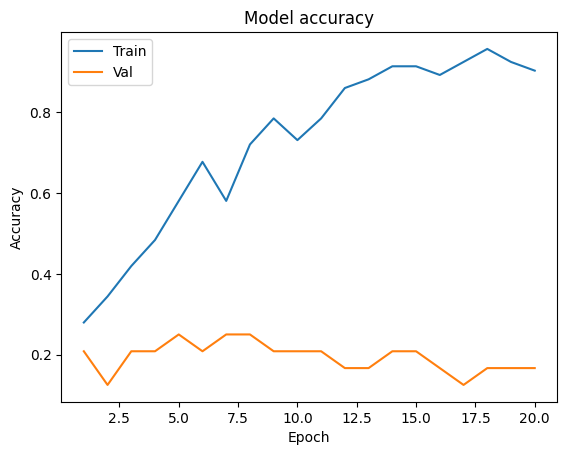

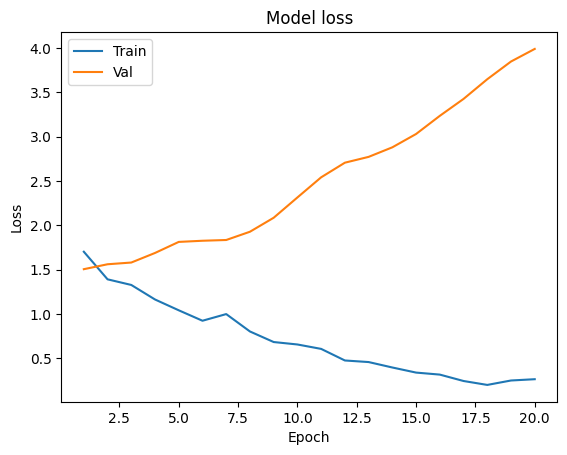

In [62]:
plot_learningCurve(history, 20)
